In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest


In [4]:
df=pd.read_csv('security.csv')
df.head()

,packet_size,inter_arrival_time,src_port,dst_port,packet_count_5s,mean_packet_size,spectral_entropy,frequency_band_energy,label,protocol_type_TCP,protocol_type_UDP,src_ip_192.168.1.2,src_ip_192.168.1.3,dst_ip_192.168.1.5,dst_ip_192.168.1.6,tcp_flags_FIN,tcp_flags_SYN,tcp_flags_SYN-ACK
0,0.405154,0.620362,62569,443,0.857143,0.0,0.834066,0.534891,0.0,False,True,True,False,False,False,False,False,False
1,0.527559,0.741288,59382,443,0.785714,0.0,0.147196,0.990757,0.0,False,True,False,False,False,True,False,True,False
2,0.226199,0.485116,65484,80,0.285714,0.0,0.855192,0.031781,0.0,False,True,False,False,True,False,False,False,False
3,0.573372,0.450965,51707,53,0.142857,0.0,0.153220,0.169958,0.0,False,False,False,True,False,False,False,False,False
4,0.651396,0.888740,26915,53,0.714286,0.0,0.923916,0.552053,0.0,True,False,False,True,False,False,False,True,False


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   packet_size            1000 non-null   float64
 1   inter_arrival_time     1000 non-null   float64
 2   src_port               1000 non-null   int64  
 3   dst_port               1000 non-null   int64  
 4   packet_count_5s        1000 non-null   float64
 5   mean_packet_size       1000 non-null   float64
 6   spectral_entropy       1000 non-null   float64
 7   frequency_band_energy  1000 non-null   float64
 8   label                  1000 non-null   float64
 9   protocol_type_TCP      1000 non-null   bool   
 10  protocol_type_UDP      1000 non-null   bool   
 11  src_ip_192.168.1.2     1000 non-null   bool   
 12  src_ip_192.168.1.3     1000 non-null   bool   
 13  dst_ip_192.168.1.5     1000 non-null   bool   
 14  dst_ip_192.168.1.6     1000 non-null   bool   
 15  tcp_f

In [6]:
df.isna().sum() 

packet_size              0
inter_arrival_time       0
src_port                 0
dst_port                 0
packet_count_5s          0
mean_packet_size         0
spectral_entropy         0
frequency_band_energy    0
label                    0
protocol_type_TCP        0
protocol_type_UDP        0
src_ip_192.168.1.2       0
src_ip_192.168.1.3       0
dst_ip_192.168.1.5       0
dst_ip_192.168.1.6       0
tcp_flags_FIN            0
tcp_flags_SYN            0
tcp_flags_SYN-ACK        0
dtype: int64

In [9]:
df['tcp_flags_SYN-ACK'].value_counts() 

tcp_flags_SYN-ACK
False    745
True     255
Name: count, dtype: int64

In [11]:
features=df.drop('label',axis=1)
for col in df.columns:
    if df[col].dtype == 'bool':
        df[col] = df[col].astype(int)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   packet_size            1000 non-null   float64
 1   inter_arrival_time     1000 non-null   float64
 2   src_port               1000 non-null   int64  
 3   dst_port               1000 non-null   int64  
 4   packet_count_5s        1000 non-null   float64
 5   mean_packet_size       1000 non-null   float64
 6   spectral_entropy       1000 non-null   float64
 7   frequency_band_energy  1000 non-null   float64
 8   label                  1000 non-null   float64
 9   protocol_type_TCP      1000 non-null   int64  
 10  protocol_type_UDP      1000 non-null   int64  
 11  src_ip_192.168.1.2     1000 non-null   int64  
 12  src_ip_192.168.1.3     1000 non-null   int64  
 13  dst_ip_192.168.1.5     1000 non-null   int64  
 14  dst_ip_192.168.1.6     1000 non-null   int64  
 15  tcp_f

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
sc_features = scaler.fit_transform(features)   


In [16]:
sc_features_df=pd.DataFrame(sc_features, columns=features.columns)
sc_features_df.head()

,packet_size,inter_arrival_time,src_port,dst_port,packet_count_5s,mean_packet_size,spectral_entropy,frequency_band_energy,protocol_type_TCP,protocol_type_UDP,src_ip_192.168.1.2,src_ip_192.168.1.3,dst_ip_192.168.1.5,dst_ip_192.168.1.6,tcp_flags_FIN,tcp_flags_SYN,tcp_flags_SYN-ACK
0,-0.336115,0.384724,1.650011,1.351370,1.155602,0.0,1.157333,0.166460,-0.671847,1.347925,1.471243,-0.714545,-0.712949,-0.722544,-0.57889,-0.554247,-0.585049
1,0.086758,0.815080,1.477849,1.351370,0.919957,0.0,-1.188696,1.707564,-0.671847,1.347925,-0.679697,-0.714545,-0.712949,1.383999,-0.57889,1.804250,-0.585049
2,-0.954350,-0.096598,1.807479,-0.665426,-0.729556,0.0,1.229489,-1.534356,-0.671847,1.347925,-0.679697,-0.714545,1.402626,-0.722544,-0.57889,-0.554247,-0.585049
3,0.245026,-0.218135,1.063244,-0.815436,-1.200846,0.0,-1.168120,-1.067234,-0.671847,-0.741881,-0.679697,1.399493,-0.712949,-0.722544,-0.57889,-0.554247,-0.585049
4,0.514577,1.339842,-0.276022,-0.815436,0.684312,0.0,1.464215,0.224480,1.488433,-0.741881,-0.679697,1.399493,-0.712949,-0.722544,-0.57889,1.804250,-0.585049


In [17]:
features.columns

Index(['packet_size', 'inter_arrival_time', 'src_port', 'dst_port',
       'packet_count_5s', 'mean_packet_size', 'spectral_entropy',
       'frequency_band_energy', 'protocol_type_TCP', 'protocol_type_UDP',
       'src_ip_192.168.1.2', 'src_ip_192.168.1.3', 'dst_ip_192.168.1.5',
       'dst_ip_192.168.1.6', 'tcp_flags_FIN', 'tcp_flags_SYN',
       'tcp_flags_SYN-ACK'],
      dtype='object')

In [19]:
n_estimators=100
contimation= 0.01
sample_size=256


In [22]:
model=IsolationForest(n_estimators=n_estimators,contamination=contimation,max_samples=sample_size,random_state=42)
model.fit(sc_features_df)
anamoly_labels=model.predict(sc_features_df)
sc_features_df['anamoly']=anamoly_labels

In [23]:
sc_features_df.head()

,packet_size,inter_arrival_time,src_port,dst_port,packet_count_5s,mean_packet_size,spectral_entropy,frequency_band_energy,protocol_type_TCP,protocol_type_UDP,src_ip_192.168.1.2,src_ip_192.168.1.3,dst_ip_192.168.1.5,dst_ip_192.168.1.6,tcp_flags_FIN,tcp_flags_SYN,tcp_flags_SYN-ACK,anamoly
0,-0.336115,0.384724,1.650011,1.351370,1.155602,0.0,1.157333,0.166460,-0.671847,1.347925,1.471243,-0.714545,-0.712949,-0.722544,-0.57889,-0.554247,-0.585049,1
1,0.086758,0.815080,1.477849,1.351370,0.919957,0.0,-1.188696,1.707564,-0.671847,1.347925,-0.679697,-0.714545,-0.712949,1.383999,-0.57889,1.804250,-0.585049,1
2,-0.954350,-0.096598,1.807479,-0.665426,-0.729556,0.0,1.229489,-1.534356,-0.671847,1.347925,-0.679697,-0.714545,1.402626,-0.722544,-0.57889,-0.554247,-0.585049,1
3,0.245026,-0.218135,1.063244,-0.815436,-1.200846,0.0,-1.168120,-1.067234,-0.671847,-0.741881,-0.679697,1.399493,-0.712949,-0.722544,-0.57889,-0.554247,-0.585049,1
4,0.514577,1.339842,-0.276022,-0.815436,0.684312,0.0,1.464215,0.224480,1.488433,-0.741881,-0.679697,1.399493,-0.712949,-0.722544,-0.57889,1.804250,-0.585049,1


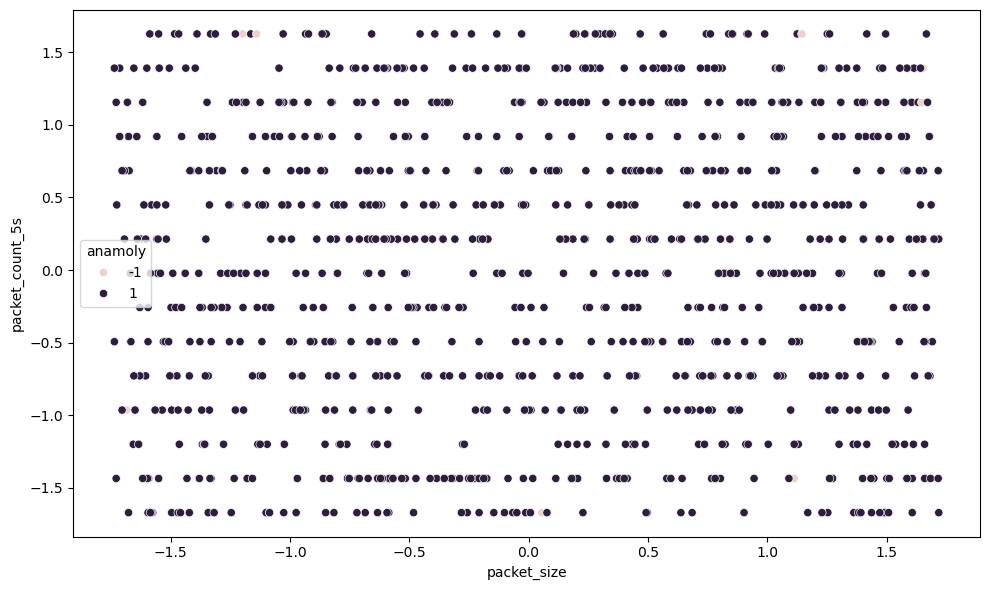

In [27]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=sc_features_df,x='packet_size',y='packet_count_5s',hue='anamoly')
plt.tight_layout()
plt.show()